In [175]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

In [176]:
df = pd.read_csv('/Users/boydoyier/Documents/git_projects/activities.csv') 
df.columns=df.columns.str.lower() 

In [177]:
all_columns = df.columns
#print(all_columns)


In [178]:
cols = ['activity date', 'activity type', 'elapsed time', 'distance', 'moving time', 
         'max heart rate', 'elevation gain', 'max speed', 'average speed', 'calories',
         'average temperature', 'humidity'
       ]
df = df[cols] 
df

,activity date,activity type,elapsed time,distance,moving time,max heart rate,elevation gain,max speed,average speed,calories,average temperature,humidity
0,"Jul 27, 2021, 6:37:20 PM",Run,3195,10.15,3163.0,NaN,85.800003,5.500000,3.208852,1037.672607,24.0,NaN
1,"Jul 31, 2021, 10:42:45 AM",Run,1997,7.01,1997.0,NaN,17.400988,6.900000,3.510215,706.300049,NaN,0.69
2,"Aug 6, 2021, 10:01:35 AM",Run,4113,5.01,3568.0,NaN,88.786102,6.900000,1.404064,537.903564,NaN,0.62
3,"Aug 8, 2021, 7:50:34 AM",Run,2436,8.02,2436.0,NaN,89.433914,10.600000,3.292365,825.126709,NaN,0.71
4,"Aug 9, 2021, 6:06:42 PM",Run,3370,10.13,3279.0,NaN,142.481674,12.600000,3.089844,1063.757202,NaN,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...
327,"Sep 10, 2024, 2:04:26 PM",Run,1345,4.23,974.0,187.0,40.115639,6.340000,4.343943,237.000000,NaN,0.62
328,"Sep 21, 2024, 11:35:16 AM",Run,5801,21.21,5764.0,178.0,167.088028,8.259961,3.680292,1401.000000,NaN,0.82
329,"Sep 28, 2024, 8:29:24 AM",Run,5954,18.64,5805.0,178.0,214.887054,5.759961,3.210870,1457.000000,NaN,0.78
330,"Oct 1, 2024, 2:04:05 PM",Run,1323,4.16,945.0,177.0,38.025867,8.215000,4.402116,227.000000,NaN,0.68


In [179]:
df['activity_date'] = pd.to_datetime(df['activity date'])
df['start_time'] = df['activity_date'].dt.time
df['start_date_local'] = df['activity_date'].dt.date
df['month'] = df['activity_date'].dt.month_name()
df['year'] = df['activity_date'].dt.year
#df['year'] = (df['year']).astype(np.object) #change year from numeric to object
#df['dayofyear'] = df['activity_date'].dt.dayofyear
df['day'] = df['activity_date'].dt.day

#df['dayofyear'] = pd.to_numeric(df['dayofyear'])
df['distance'] = pd.to_numeric(df['distance'], errors='coerce').fillna(0).astype('int64')

#df['distance'] = pd.to_numeric(df['distance'], errors = 'coerce')
#df.head(3)
## day and year need to be changed from integers to objects

/var/folders/20/v81skv3s7vdb3xb49dlqvzp40000gn/T/ipykernel_1929/4268498353.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['activity_date'] = pd.to_datetime(df['activity date'])


In [180]:
df['elapsed minutes'] = df['elapsed time'] /60 
df['km per hour'] = df['distance'] / (df['elapsed minutes'] / 60)
df['avg pace'] = df['elapsed minutes'] / df['distance']
#df.head()

In [181]:
df = df[df['distance'] <= 70]
df = df[df['elapsed minutes'] >= 10]
#df = df[df['km per hour'] > 5]

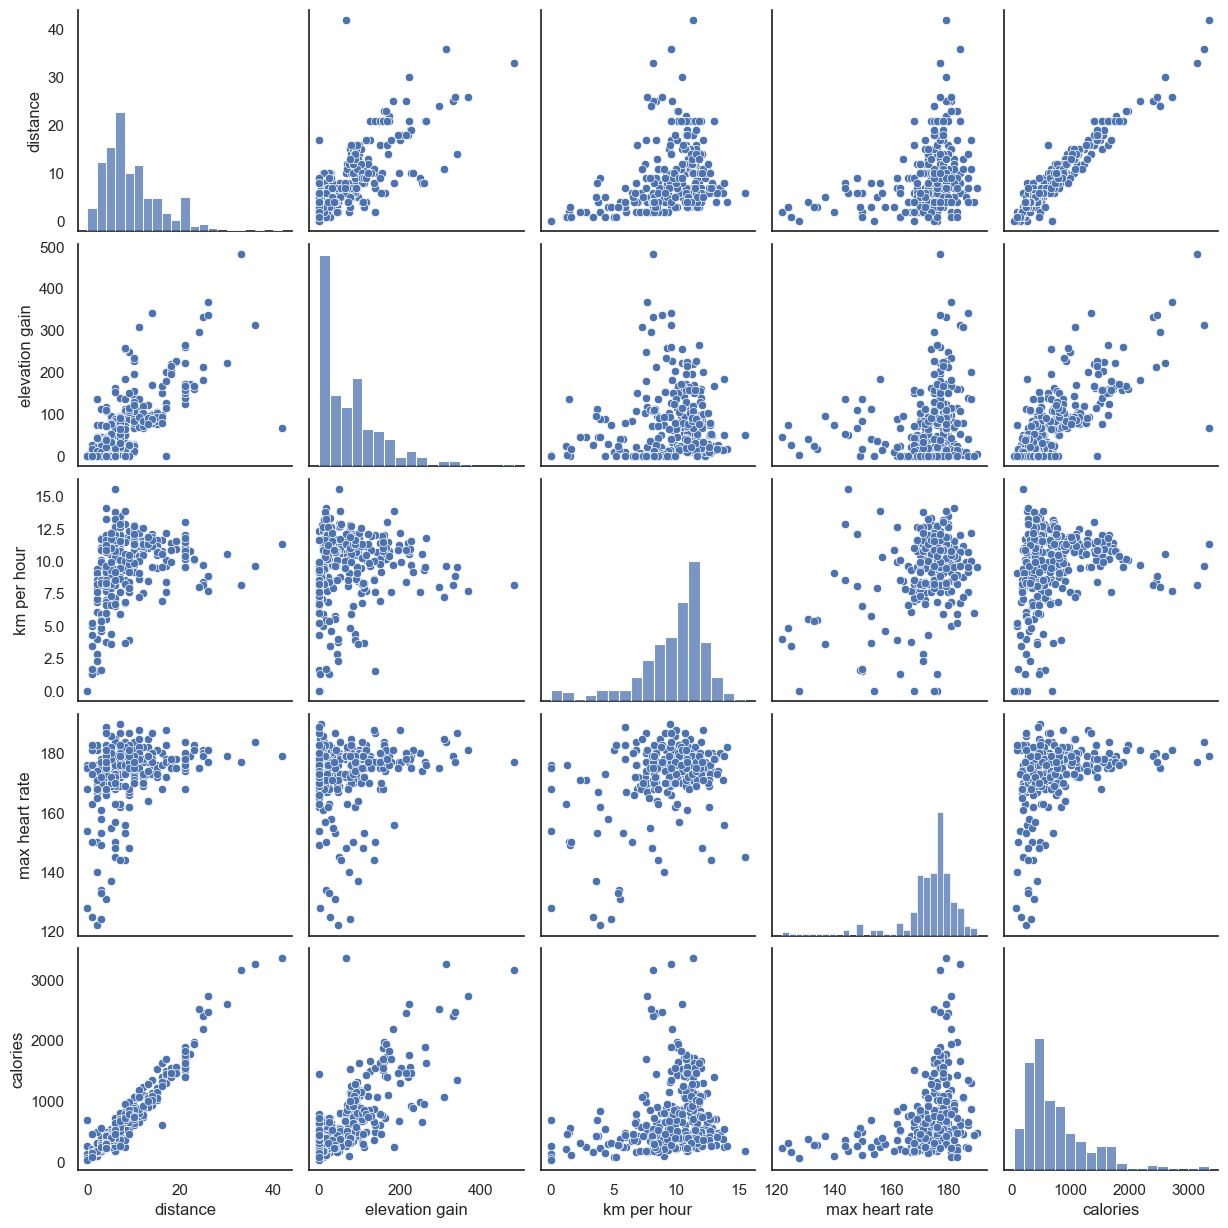

In [182]:
pp_df = df[['distance', 'elevation gain', 'km per hour', 'max heart rate', 'calories']]
sns.pairplot(pp_df);

In [183]:
df.describe().round(0)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,elapsed time,distance,moving time,max heart rate,elevation gain,max speed,average speed,calories,average temperature,humidity,activity_date,year,day,elapsed minutes,km per hour,avg pace
count,314.0,314.0,314.0,291.0,314.0,314.0,314.0,314.0,3.0,278.0,314,314.0,314.0,314.0,314.0,314.0
mean,3414.0,9.0,3188.0,173.0,77.0,7.0,3.0,752.0,23.0,1.0,2023-01-01 02:27:51.429936128,2023.0,17.0,57.0,10.0,inf
min,687.0,0.0,381.0,122.0,0.0,0.0,0.0,31.0,21.0,0.0,2021-07-27 18:37:20,2021.0,1.0,11.0,0.0,4.0
25%,1867.0,5.0,1724.0,171.0,16.0,5.0,3.0,375.0,22.0,1.0,2022-03-10 19:41:09.500000,2022.0,9.0,31.0,8.0,5.0
50%,2844.0,7.0,2604.0,175.0,64.0,6.0,3.0,586.0,23.0,1.0,2022-10-17 15:24:41.500000,2022.0,17.0,47.0,11.0,6.0
75%,4246.0,12.0,4011.0,179.0,107.0,8.0,3.0,974.0,24.0,1.0,2023-12-15 03:21:26.500000,2023.0,24.0,71.0,12.0,7.0
max,14595.0,42.0,14220.0,190.0,482.0,15.0,5.0,3350.0,24.0,1.0,2024-10-17 14:26:15,2024.0,31.0,243.0,16.0,inf
std,2345.0,7.0,2254.0,11.0,77.0,2.0,1.0,567.0,2.0,0.0,NaN,1.0,9.0,39.0,3.0,NaN


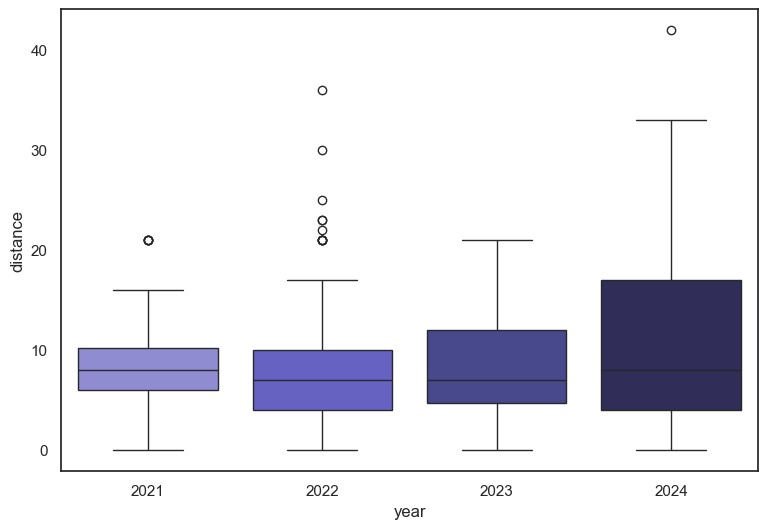

In [184]:
palette_box = ["#8481DD", "#5752D1", "#3C3D99", "#2A265F"]
fig, ax = plt.subplots()
sns.set(style="whitegrid", font_scale=1)
sns.boxplot(x="year", y="distance", hue="year", data=df, palette=palette_box)
ax.legend_.remove()
plt.gcf().set_size_inches(9, 6)

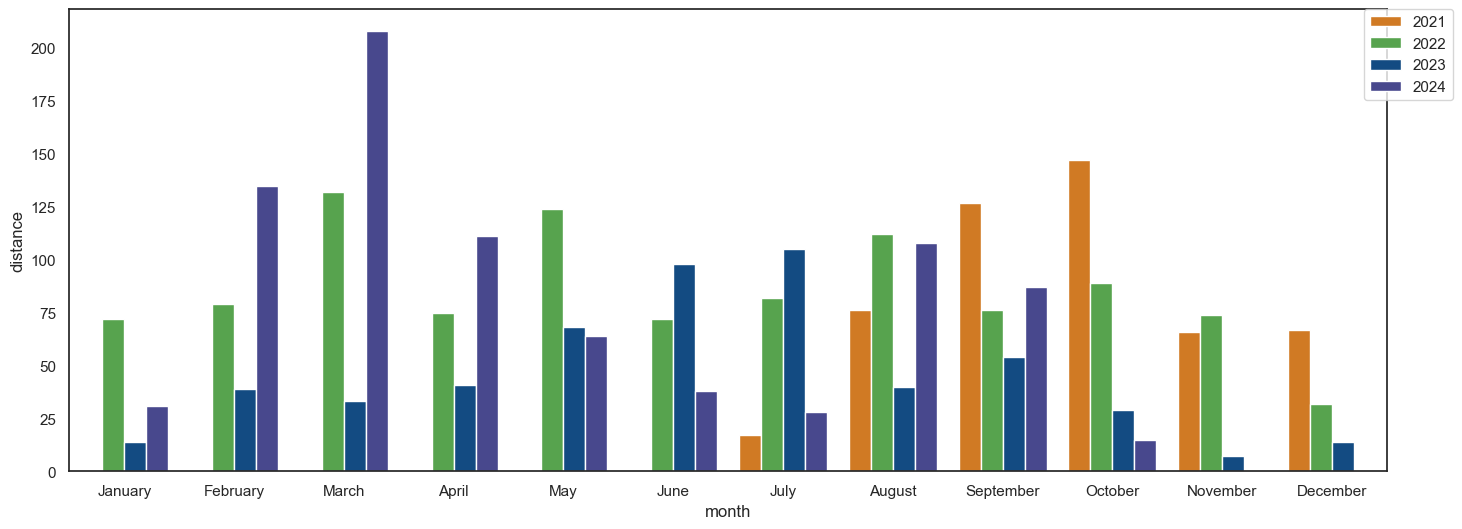

In [185]:
palette_bar = ["#EC7A08", "#4CB140", "#004B95", "#3C3D99"]

sns.set_style('white')
sns.barplot(x='month', y='distance', data=df, hue='year', errorbar=None, estimator=np.sum, palette=palette_bar,
           order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

plt.gcf().set_size_inches(17, 6)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0)

plt.show()

/var/folders/20/v81skv3s7vdb3xb49dlqvzp40000gn/T/ipykernel_1929/1066936321.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="season", y="distance", palette=palette_season,


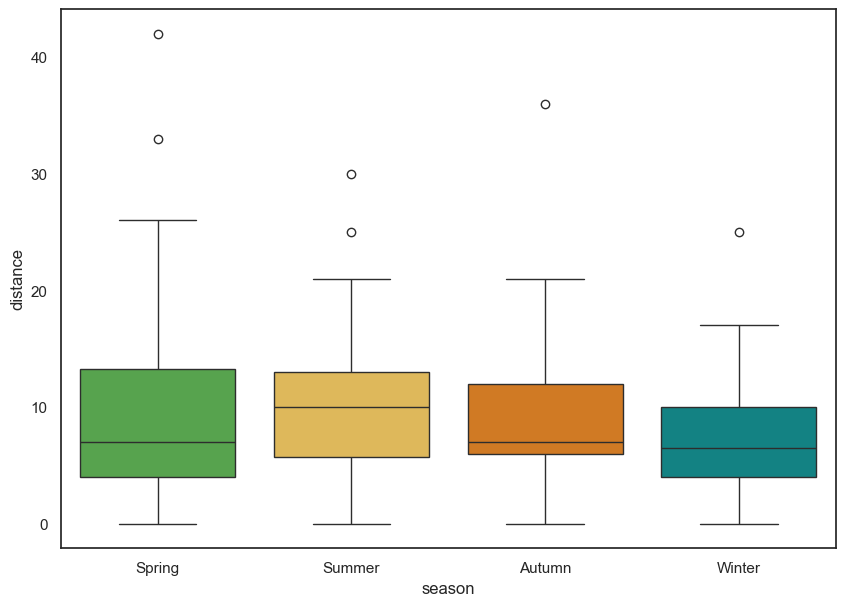

In [186]:
df['season'] = 'unknown'
df.loc[(df["month"].isin(["March", "April", "May"])), 'season'] = 'Spring'
df.loc[(df["month"].isin(["June", "July", "August"])), 'season'] = 'Summer'
df.loc[(df["month"].isin(["September", "October", "November"])), 'season'] = 'Autumn'
df.loc[(df["month"].isin(["December", "January", "February"])), 'season'] = 'Winter'

palette_season = ["#4CB140", "#F4C145", "#EC7A08", "#009596"]
ax = sns.boxplot(x="season", y="distance", palette=palette_season,
                    data=df,
                    order =["Spring", 'Summer', 'Autumn', 'Winter'])
plt.gcf().set_size_inches(10, 7)

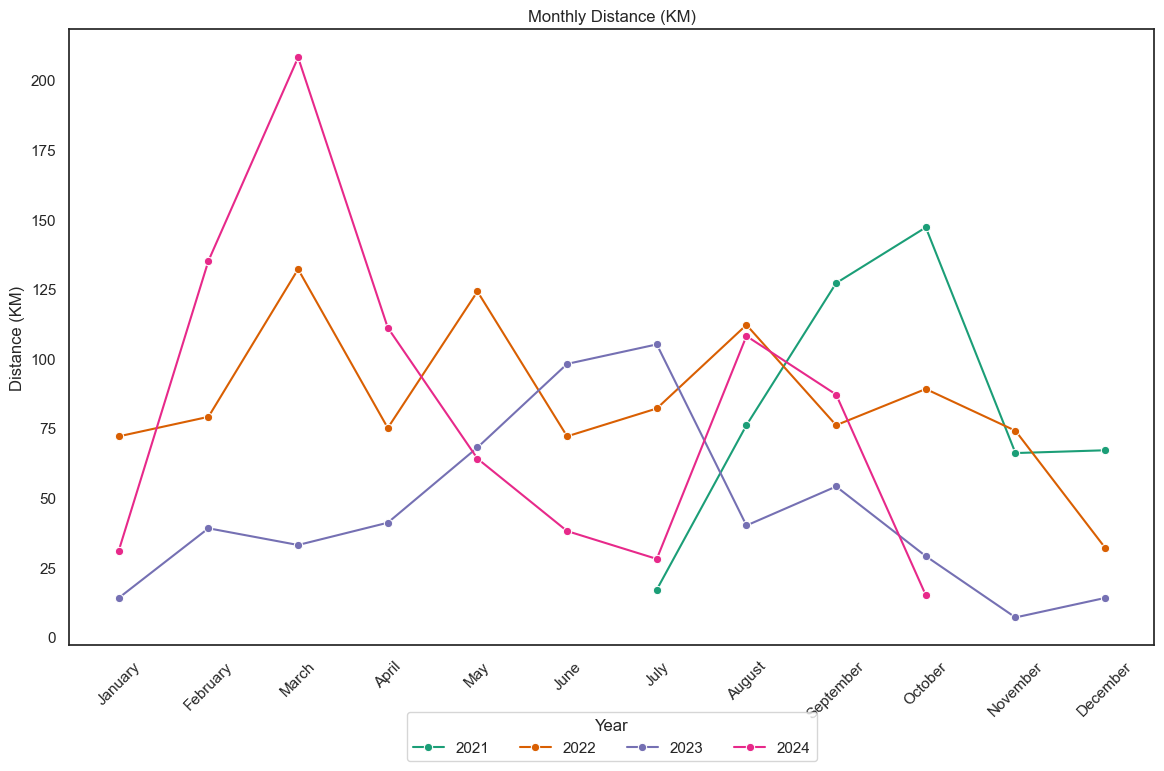

In [187]:
df['activity_date'] = pd.to_datetime(df['activity_date'])

df['month'] = df['activity_date'].dt.strftime('%B')  # Month name (January, February, etc.)
df['month_num'] = df['activity_date'].dt.month  # Month as a number (1-12) for sorting purposes
df['year'] = df['activity_date'].dt.year


df_monthly = df.groupby(['year', 'month_num', 'month'], as_index=False)['distance'].sum()
df_monthly['month_year'] = df_monthly['month'] + ' ' + df_monthly['year'].astype(str)
df_monthly = df_monthly.sort_values(['year', 'month_num'])

sns.set_style('white')

sns.lineplot(x='month_num', y='distance', hue='year', data=df_monthly,
             palette='Dark2', marker="o")

month_labels = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
                5: 'May', 6: 'June', 7: 'July', 8: 'August',
                9: 'September', 10: 'October', 11: 'November', 12: 'December'}

plt.xticks(ticks=list(month_labels.keys()), labels=list(month_labels.values()), rotation=45)

plt.title('Monthly Distance (KM)')
plt.xlabel('')
plt.ylabel('Distance (KM)')
plt.legend(title='Year', loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4)

plt.gcf().set_size_inches(14, 8)

plt.show()




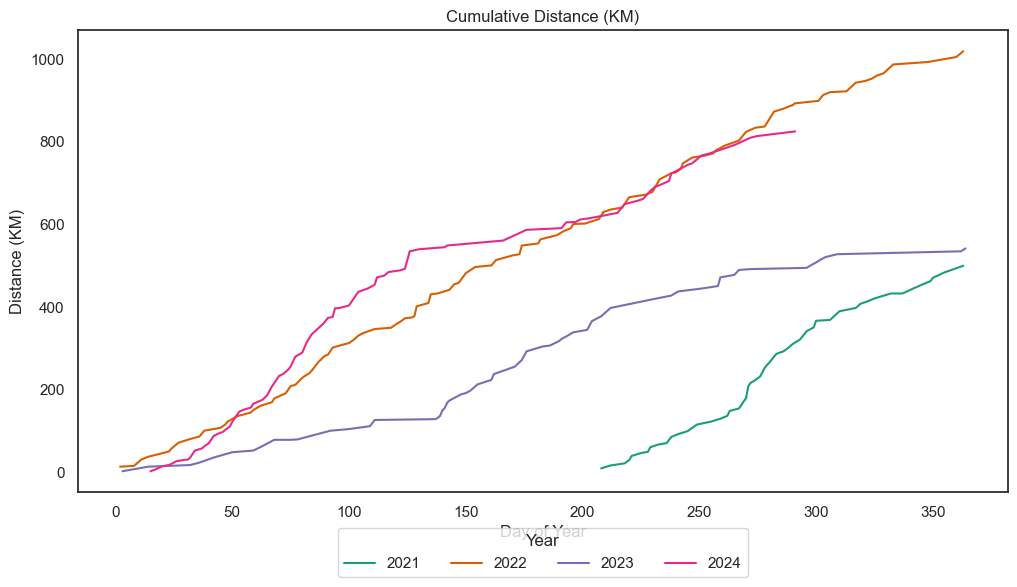

In [188]:

df['activity_date'] = pd.to_datetime(df['activity_date'])
df['day_of_year'] = df['activity_date'].dt.dayofyear

df['cumulative_distance'] = df.sort_values(by=['activity_date']).groupby('year')['distance'].cumsum()

sns.set_style('white')

sns.lineplot(x='day_of_year', y='cumulative_distance', hue='year', data=df,
             palette='Dark2')  

plt.title('Cumulative Distance (KM)')
plt.xlabel('Day of Year')
plt.ylabel('Distance (KM)')
plt.legend(title='Year', loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4)

plt.gcf().set_size_inches(12, 6)

plt.show()

